<a href="https://colab.research.google.com/github/realyou0312/AED_Project/blob/main/Practice%20Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/공빅 프로젝트/JEJU_0812/전처리데이터/'

In [ ]:
train = pd.read_csv(path + "X_TRAIN.csv")
test = pd.read_csv(path + "X_TEST.csv")
FINAL = pd.read_csv(path + "최종데이터전처리.csv", encoding='cp949')

In [ ]:
train

,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,ACCOM,CAFE,FARM,MART,PARK,PARKING,RESTAURANT,SAFE,SPORTS,TOUR,PEOPLE
0,1464625,885375,나나8564,나나85C64B,0,0,0,0,0,0,0,0,0,0,0.000165
1,1464625,886125,나나8664,나나86C64A,0,0,0,0,0,0,0,0,0,0,0.000005
2,1464875,885125,나나8564,나나85D64A,0,0,0,0,0,0,0,0,0,0,0.000101
3,1464875,885375,나나8564,나나85D64B,0,0,0,0,0,0,0,0,0,0,0.000374
4,1464875,886125,나나8664,나나86D64A,0,0,0,0,0,0,0,0,0,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,1553125,888125,나다8853,나다88A53A,0,0,0,0,0,0,0,0,0,0,0.000120
17221,1553125,888625,나다8853,나다88A53C,0,0,0,0,0,0,0,0,0,0,0.000292
17222,1553125,888875,나다8853,나다88A53D,0,0,0,0,0,0,2,0,0,0,0.000198
17223,1553375,887625,나다8753,나다87B53C,0,0,0,0,0,0,0,0,0,0,0.000058


In [ ]:
train.drop(['X_INDEX', 'Y_INDEX', 'SPO_NO_CD', 'SPO_NO_250'], axis=1, inplace=True)

In [ ]:
df = train.corr()

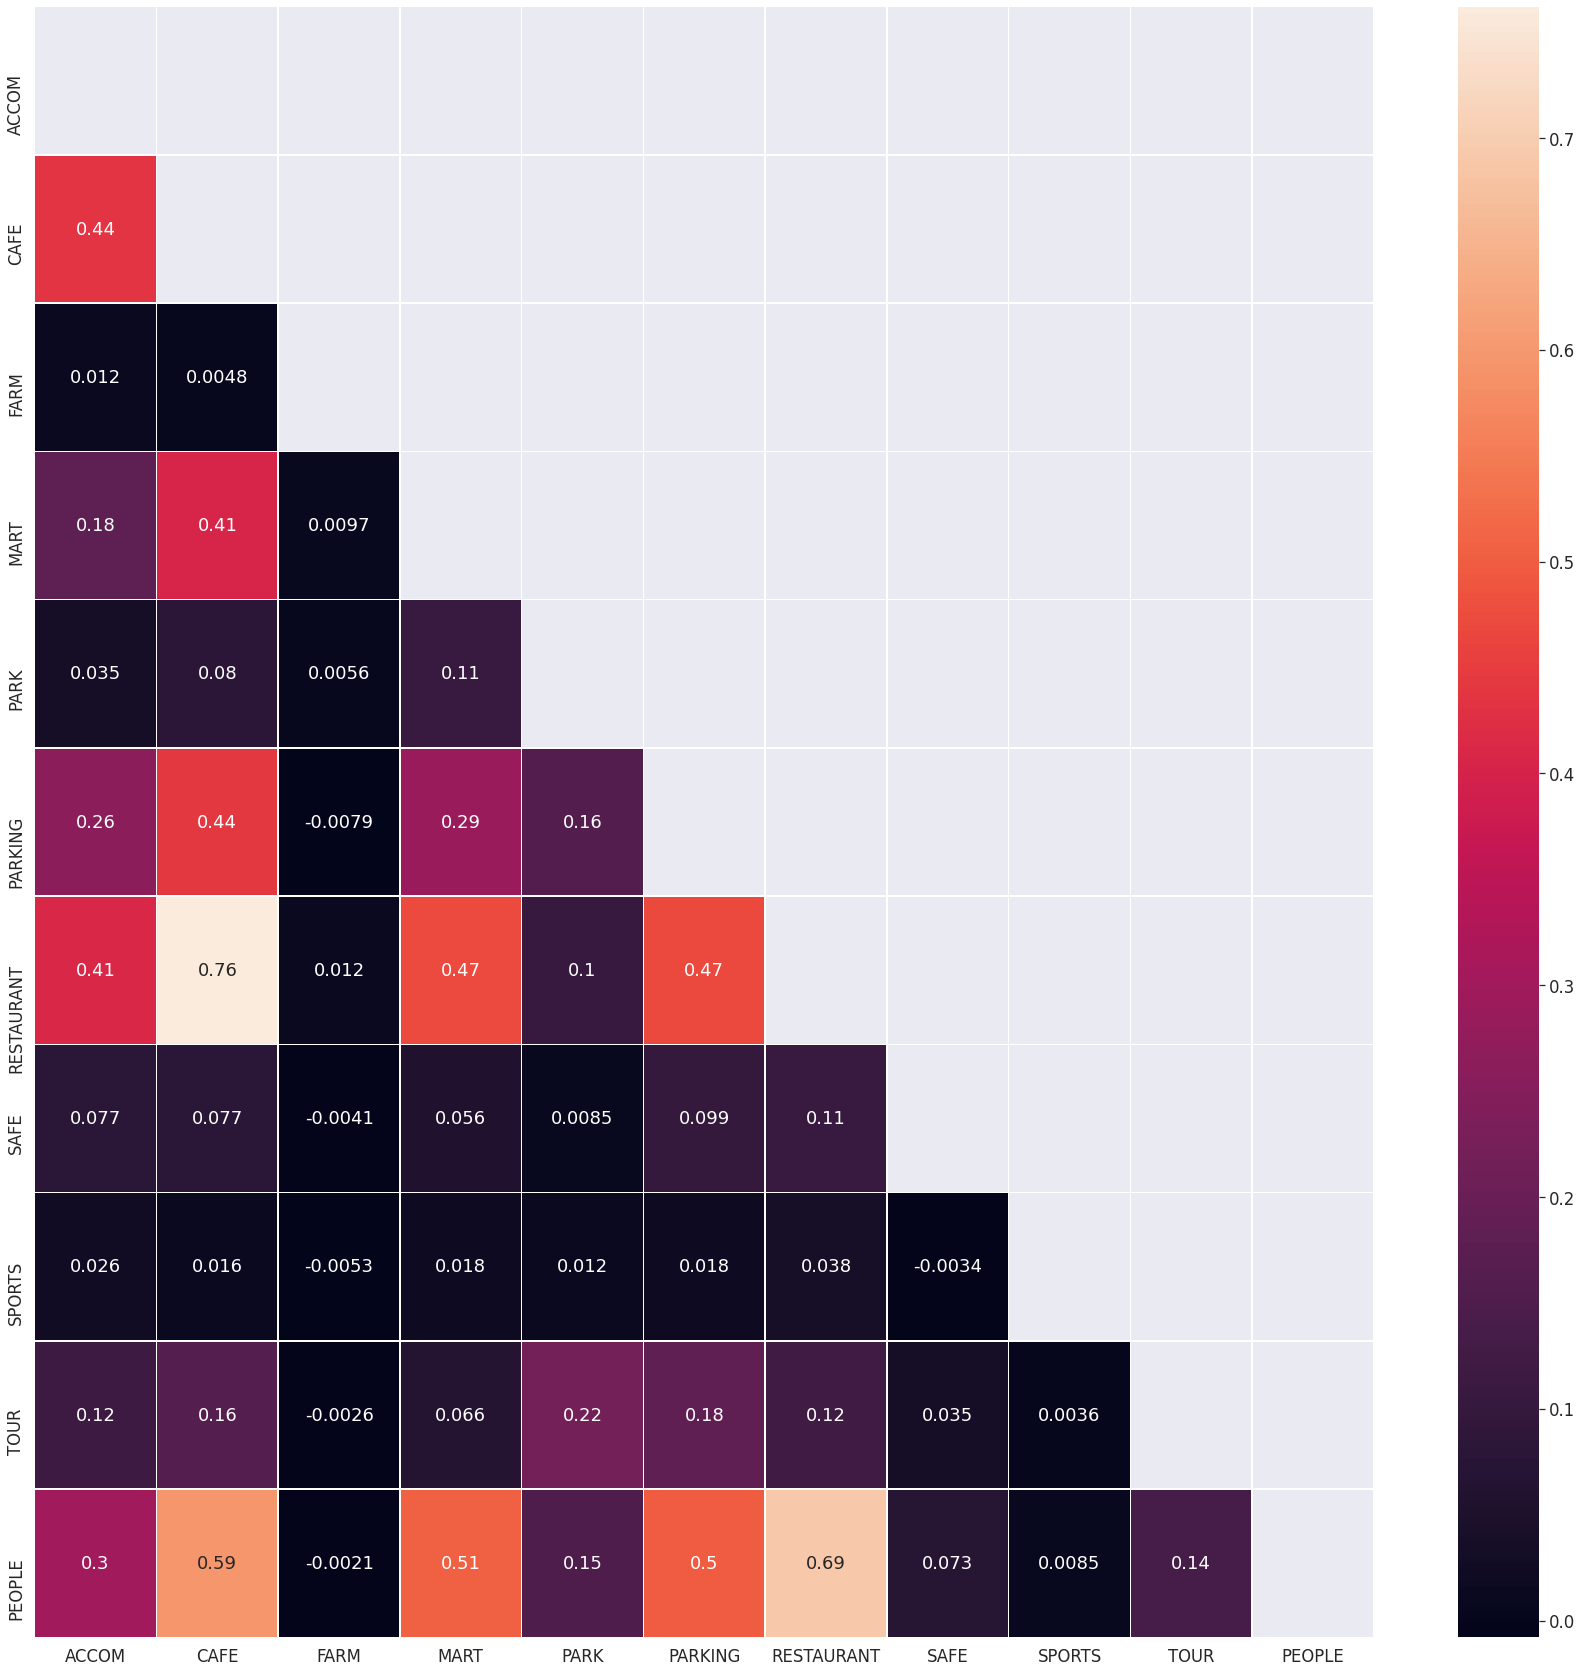

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.set(font_scale=1.5) 
plt.figure(figsize=(30,30))
plt.rc('font', family='NanumBarunGothic') 

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, annot= True, mask=mask, fmt ='0.2g', linewidths=.5)
# plt.show()

In [ ]:
train

,ACCOM,CAFE,FARM,MART,PARK,PARKING,RESTAURANT,SAFE,SPORTS,TOUR,PEOPLE
0,0,0,0,0,0,0,0,0,0,0,0.000165
1,0,0,0,0,0,0,0,0,0,0,0.000005
2,0,0,0,0,0,0,0,0,0,0,0.000101
3,0,0,0,0,0,0,0,0,0,0,0.000374
4,0,0,0,0,0,0,0,0,0,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...
17220,0,0,0,0,0,0,0,0,0,0,0.000120
17221,0,0,0,0,0,0,0,0,0,0,0.000292
17222,0,0,0,0,0,0,2,0,0,0,0.000198
17223,0,0,0,0,0,0,0,0,0,0,0.000058


In [ ]:
X =train.drop(columns=['PEOPLE'])

In [ ]:
Y =train['PEOPLE']

In [ ]:
num_temp = X

In [ ]:
num_temp = pd.DataFrame(columns = list(num_temp), data = StandardScaler().fit_transform(num_temp))

In [ ]:
train_y = Y
scl_train = num_temp

In [ ]:
temp_list = list(scl_train)

In [ ]:
anova_data = pd.DataFrame(columns = list(scl_train), data = scl_train)
anova_data = anova_data[temp_list].copy()
lm = sm.OLS(train_y.values, anova_data[list(anova_data)])
results = lm.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
result_summary = pd.DataFrame(pd.read_html(results_as_html, header=0, index_col=0)[0])
print(result_summary[result_summary['P>|t|'] < 0.005].index.tolist())
results_summary

['CAFE', 'MART', 'PARK', 'PARKING', 'RESTAURANT', 'SPORTS']


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.536
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              1985.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):                        0.00
Time:                        15:34:19   Log-Likelihood:                          79562.
No. Observations:               17225   AIC:                                 -1.591e+05
Df Residuals:                   17215   BIC:                                 -1.590e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ACCOM      -1.496e-05   2.05e-05     -0.730      0.465   -5.51e-05    2.52e-05
CAFE           0.0003   2.92e-05     11.666      0.000       0.000       0.000
FARM       -2.859e-05   1.82e-05     -1.571      0.116   -6.43e-05    7.08e-06
MART           0.0007   2.08e-05     33.831      0.000       0.001       0.001
PARK           0.0001   1.88e-05      7.945      0.000       0.000       0.000
PARKING        0.0006   2.12e-05     30.628      0.000       0.001       0.001
RESTAURANT     0.0015   3.01e-05     48.645      0.000       0.001       0.002
SAFE       -3.875e-05   1.83e-05     -2.113      0.035   -7.47e-05    -2.8e-06
SPORTS     -5.779e-05   1.82e-05     -3.173      0.002   -9.35e-05   -2.21e-05
TOUR         3.82e-05    1.9e-05      2.011      0.044    9.68e-07    7.54e-05
==============================================================================
Omnibus:                    22821.585   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14722058.771
Skew:                           7.067   Prob(JB):                         0.00
Kurtosis:                     145.523   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('PEOPLE ~ ACCOM + CAFE + FARM + MART + PARK +  PARKING + RESTAURANT + SPORTS + TOUR', train, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1.134031,Intercept
1,1.266760,ACCOM
2,2.574528,CAFE
3,1.000624,FARM
4,1.309772,MART
5,1.073666,PARK
6,1.356360,PARKING
7,2.736032,RESTAURANT
8,1.002248,SPORTS
9,1.090228,TOUR


In [ ]:
vif.sort_values(by='VIF Factor').reset_index(drop=True)

,VIF Factor,features
0,1.000624,FARM
1,1.002248,SPORTS
2,1.073666,PARK
3,1.090228,TOUR
4,1.134031,Intercept
5,1.266760,ACCOM
6,1.309772,MART
7,1.356360,PARKING
8,2.574528,CAFE
9,2.736032,RESTAURANT


In [ ]:
# X_train=X_train.drop(columns=['Y_INDEX','X_INDEX','SPO_NO_CD','SPO_NO_250','JEJU_PEOPLE'])

In [ ]:
scaler = StandardScaler()
X = train.loc[:,['CAFE', 'MART', 'PARK', 'PARKING', 'RESTAURANT', 'SPORTS']]
test = test.loc[:,['CAFE', 'MART', 'PARK', 'PARKING', 'RESTAURANT', 'SPORTS']]
X = scaler.fit_transform(X_train)
test = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
rf_model= RandomForestRegressor(random_state=42)
lr_model= LinearRegression()
xgb_model= XGBRegressor(random_state=42)
lgbm_model= LGBMRegressor(random_state=42)

In [ ]:
# rf_model.fit(X_train,Y_train)
xgb_model.fit(X_train,Y_train) # Best Model인 XGB 선택

[02:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# y_pred = xgb_model.predict(X_test)

In [ ]:
xgb_model.fit(X,Y)

[02:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# predict=rf_model.predict(X_REAL)
predict=xgb_model.predict(X_test)

In [ ]:
predict

array([0.00020319, 0.00020319, 0.00020319, ..., 0.00020319, 0.00020319,
       0.00040823], dtype=float32)

In [ ]:
MSE = mean_squared_error(Y_test, predict)

In [ ]:
MSE

4.487010338238922e-06

In [ ]:
# xgb_model.fit(X,Y)
predict2=xgb_model.predict(test)

In [ ]:
X_REAL_df = pd.DataFrame(data = predict2)

In [ ]:
X_REAL_df

,0
0,0.000556
1,0.000556
2,0.000556
3,0.000556
4,0.000556
...,...
13235,0.000556
13236,0.000556
13237,0.000556
13238,0.000556


In [ ]:
test

array([[-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526],
       [-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526],
       [-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526],
       ...,
       [-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526],
       [-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526],
       [-0.00412506, -0.00207387, -0.00562368, -0.00362628, -0.00094218,
        -0.00398526]])

In [ ]:
test = pd.read_csv(path + "X_TEST.csv")

In [ ]:
test['PEOPLE'] = predict2

In [ ]:
test['PEOPLE'].value_counts()

0.000556    13090
0.001604       44
0.000734       43
0.001371       22
0.001762        8
0.004085        7
0.001428        6
0.003705        2
0.006654        2
0.004392        1
0.007941        1
0.007712        1
0.004913        1
0.005287        1
0.006155        1
0.007034        1
0.002050        1
0.011626        1
0.004355        1
0.004234        1
0.001550        1
0.009969        1
0.004383        1
0.010233        1
0.011247        1
Name: PEOPLE, dtype: int64

In [ ]:
# test.to_csv(path + 'JEJU_PRED_ALL.csv', index=False)

In [ ]:
train = pd.read_csv(path + "X_TRAIN.csv")

In [ ]:
train

,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,ACCOM,CAFE,FARM,MART,PARK,PARKING,RESTAURANT,SAFE,SPORTS,TOUR,PEOPLE
0,1464625,885375,나나8564,나나85C64B,0,0,0,0,0,0,0,0,0,0,0.000165
1,1464625,886125,나나8664,나나86C64A,0,0,0,0,0,0,0,0,0,0,0.000005
2,1464875,885125,나나8564,나나85D64A,0,0,0,0,0,0,0,0,0,0,0.000101
3,1464875,885375,나나8564,나나85D64B,0,0,0,0,0,0,0,0,0,0,0.000374
4,1464875,886125,나나8664,나나86D64A,0,0,0,0,0,0,0,0,0,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,1553125,888125,나다8853,나다88A53A,0,0,0,0,0,0,0,0,0,0,0.000120
17221,1553125,888625,나다8853,나다88A53C,0,0,0,0,0,0,0,0,0,0,0.000292
17222,1553125,888875,나다8853,나다88A53D,0,0,0,0,0,0,2,0,0,0,0.000198
17223,1553375,887625,나다8753,나다87B53C,0,0,0,0,0,0,0,0,0,0,0.000058


In [ ]:
FIN = pd.concat([train, test])

In [ ]:
FIN

,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,ACCOM,CAFE,FARM,MART,PARK,PARKING,RESTAURANT,SAFE,SPORTS,TOUR,PEOPLE
0,1464625,885375,나나8564,나나85C64B,0,0,0,0,0,0,0,0,0,0,0.000165
1,1464625,886125,나나8664,나나86C64A,0,0,0,0,0,0,0,0,0,0,0.000005
2,1464875,885125,나나8564,나나85D64A,0,0,0,0,0,0,0,0,0,0,0.000101
3,1464875,885375,나나8564,나나85D64B,0,0,0,0,0,0,0,0,0,0,0.000374
4,1464875,886125,나나8664,나나86D64A,0,0,0,0,0,0,0,0,0,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,1558125,893375,나다9358,나다93A58B,0,0,0,0,0,0,0,0,0,0,0.000556
13236,1558375,890125,나다9058,나다90B58A,0,0,0,0,0,0,0,0,0,0,0.000556
13237,1558375,891625,나다9158,나다91B58C,0,0,0,0,0,0,0,0,0,0,0.000556
13238,1558375,892375,나다9258,나다92B58B,0,0,0,0,0,0,0,0,0,0,0.000556


In [ ]:
FIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30465 entries, 0 to 13239
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Y_INDEX     30465 non-null  int64  
 1   X_INDEX     30465 non-null  int64  
 2   SPO_NO_CD   30465 non-null  object 
 3   SPO_NO_250  30465 non-null  object 
 4   ACCOM       30465 non-null  int64  
 5   CAFE        30465 non-null  int64  
 6   FARM        30465 non-null  int64  
 7   MART        30465 non-null  int64  
 8   PARK        30465 non-null  int64  
 9   PARKING     30465 non-null  int64  
 10  RESTAURANT  30465 non-null  int64  
 11  SAFE        30465 non-null  int64  
 12  SPORTS      30465 non-null  int64  
 13  TOUR        30465 non-null  int64  
 14  PEOPLE      30465 non-null  float64
dtypes: float64(1), int64(12), object(2)
memory usage: 3.7+ MB


In [ ]:
FIN.dropna(inplace=True)

In [ ]:
FIN.to_csv(path + 'JEJU_PRED_ALL.csv', index=False)

In [ ]:
FIN

,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,ACCOM,CAFE,FARM,MART,PARK,PARKING,RESTAURANT,SAFE,SPORTS,TOUR,PEOPLE
0,1464625,885375,나나8564,나나85C64B,0,0,0,0,0,0,0,0,0,0,0.000165
1,1464625,886125,나나8664,나나86C64A,0,0,0,0,0,0,0,0,0,0,0.000005
2,1464875,885125,나나8564,나나85D64A,0,0,0,0,0,0,0,0,0,0,0.000101
3,1464875,885375,나나8564,나나85D64B,0,0,0,0,0,0,0,0,0,0,0.000374
4,1464875,886125,나나8664,나나86D64A,0,0,0,0,0,0,0,0,0,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,1558125,893375,나다9358,나다93A58B,0,0,0,0,0,0,0,0,0,0,0.000556
13236,1558375,890125,나다9058,나다90B58A,0,0,0,0,0,0,0,0,0,0,0.000556
13237,1558375,891625,나다9158,나다91B58C,0,0,0,0,0,0,0,0,0,0,0.000556
13238,1558375,892375,나다9258,나다92B58B,0,0,0,0,0,0,0,0,0,0,0.000556
